<h1><center>List of Winners: Lok Sabha 2019 Elections</center></h1>

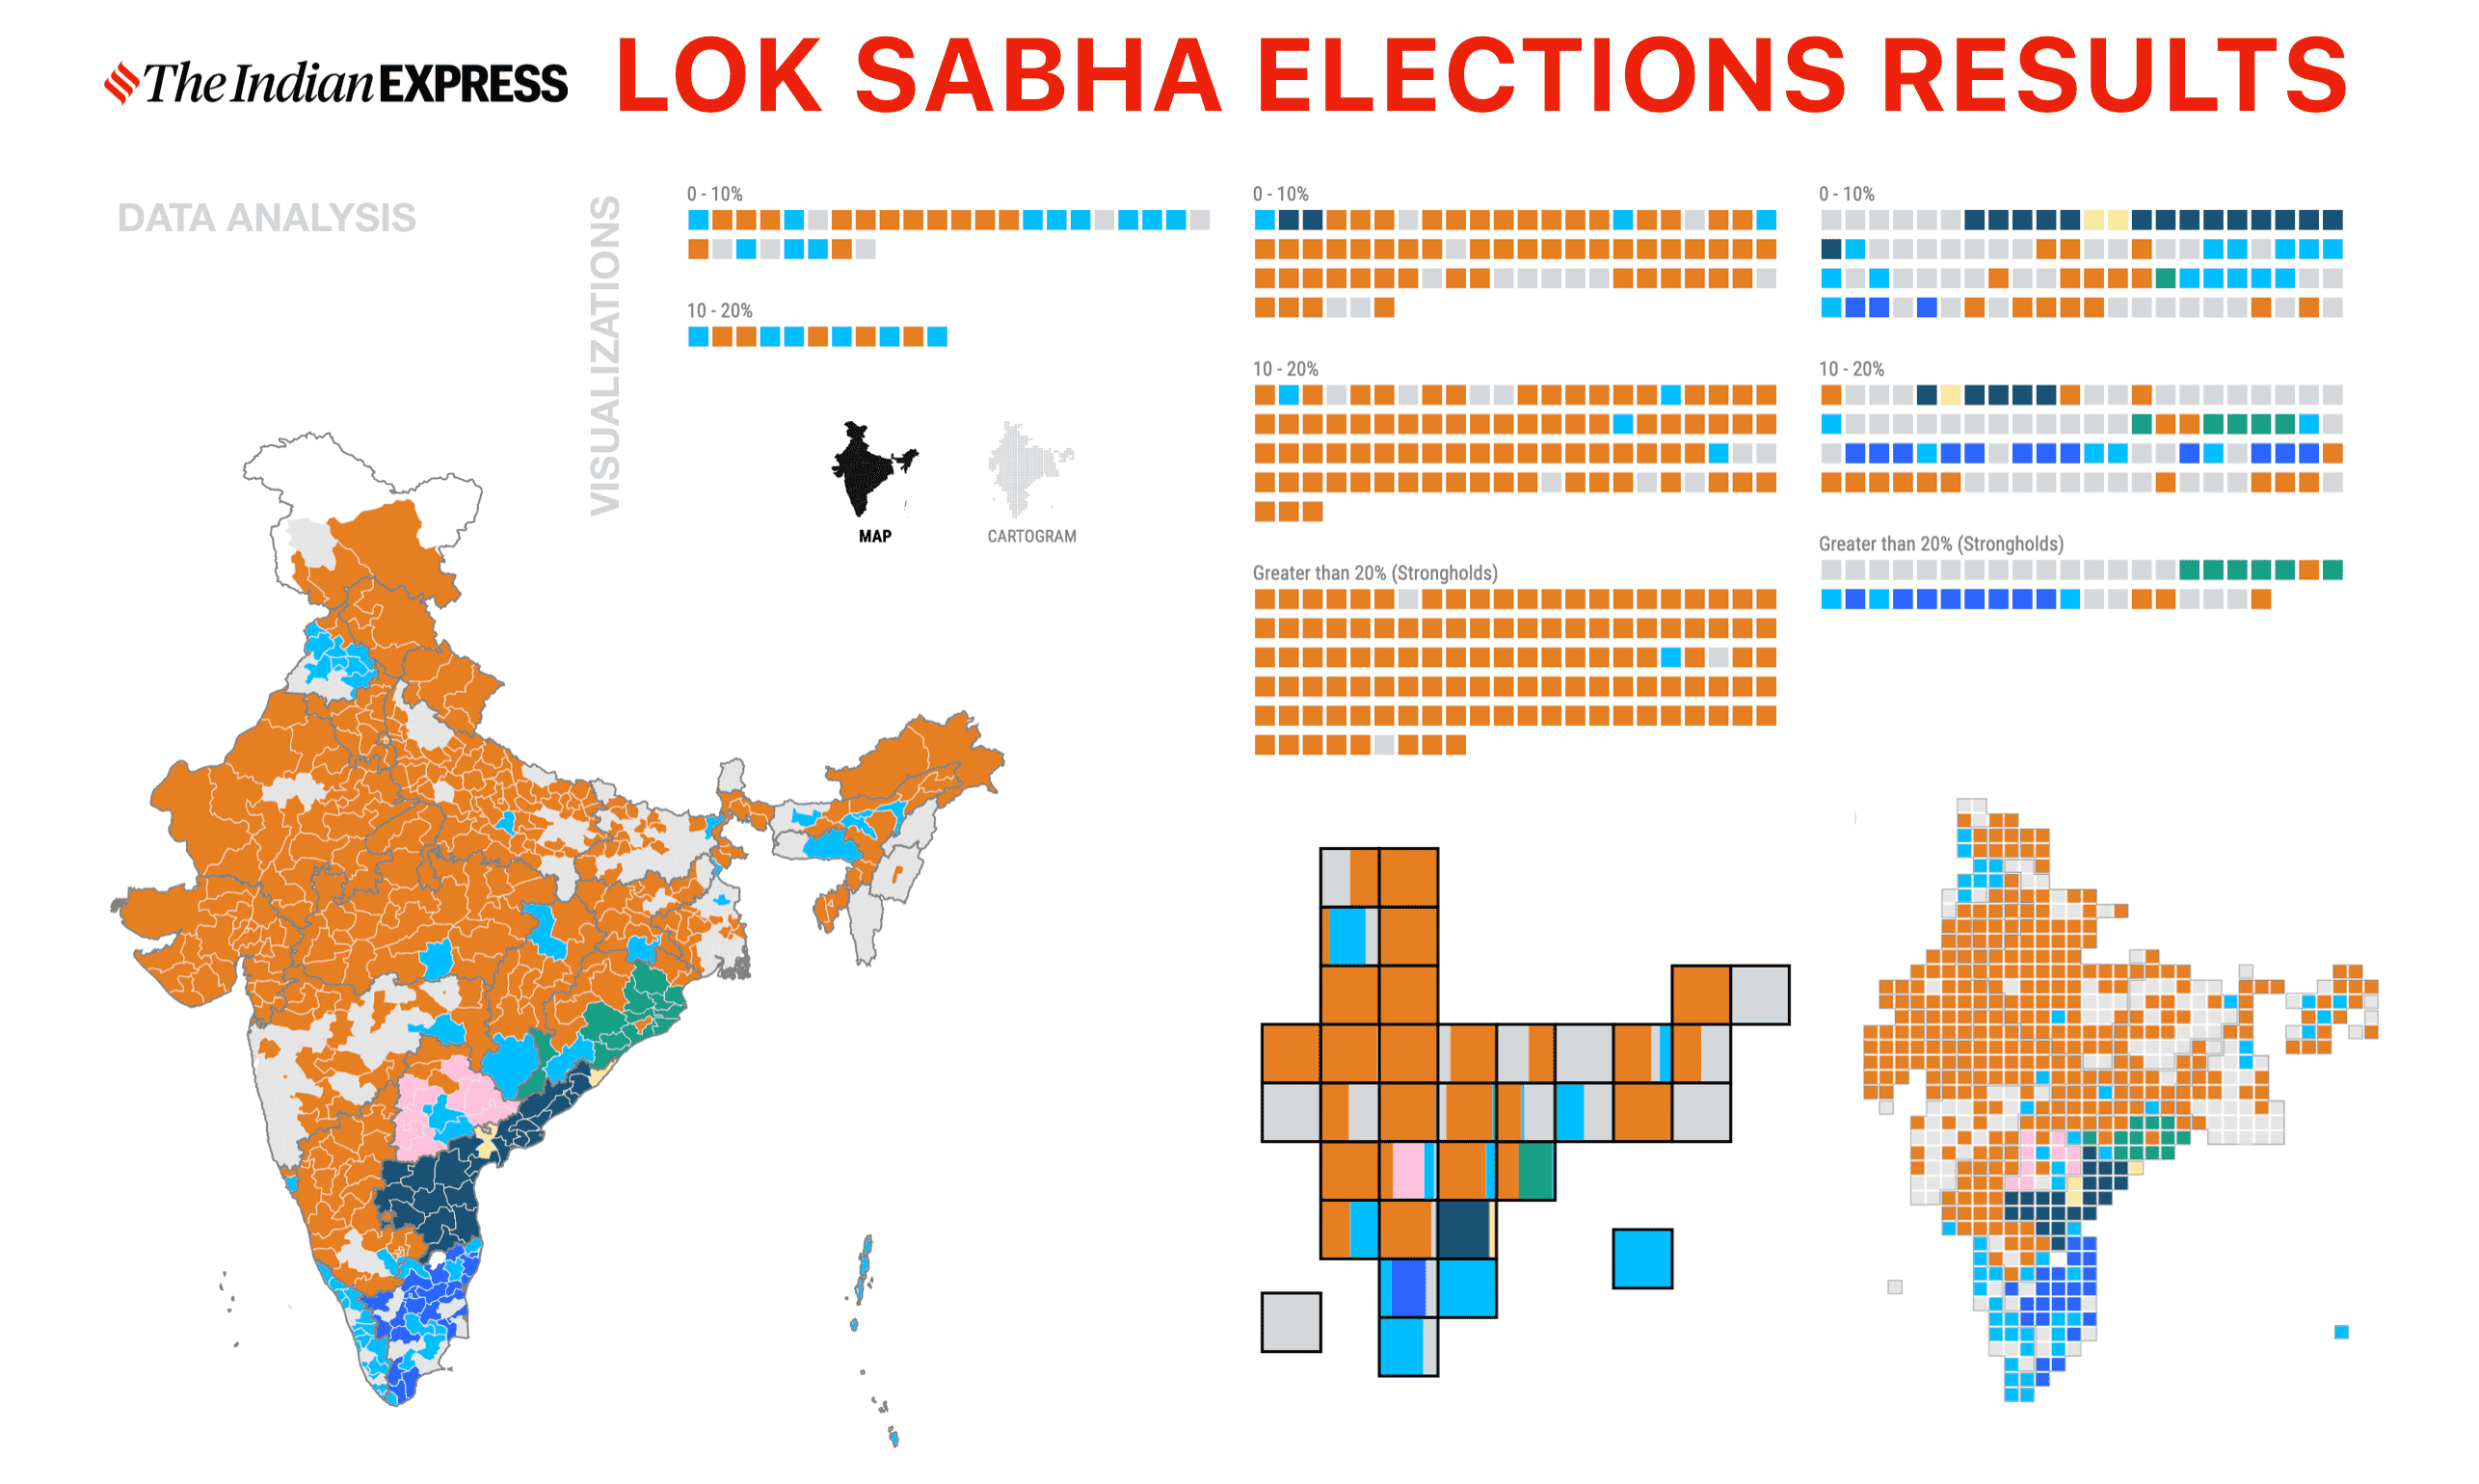

In [306]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import re

import warnings
warnings.filterwarnings("ignore")

In [307]:
URL = "https://www.myneta.info/LokSabha2019/index.php?action=show_winners&sort=default" 
req = requests.get(URL)

In [308]:
soup = BeautifulSoup(req.content, 'html5lib')

In [309]:
table = soup.find('table', class_ = 'w3-table w3-bordered')

<h3>HTML Tags</h3>

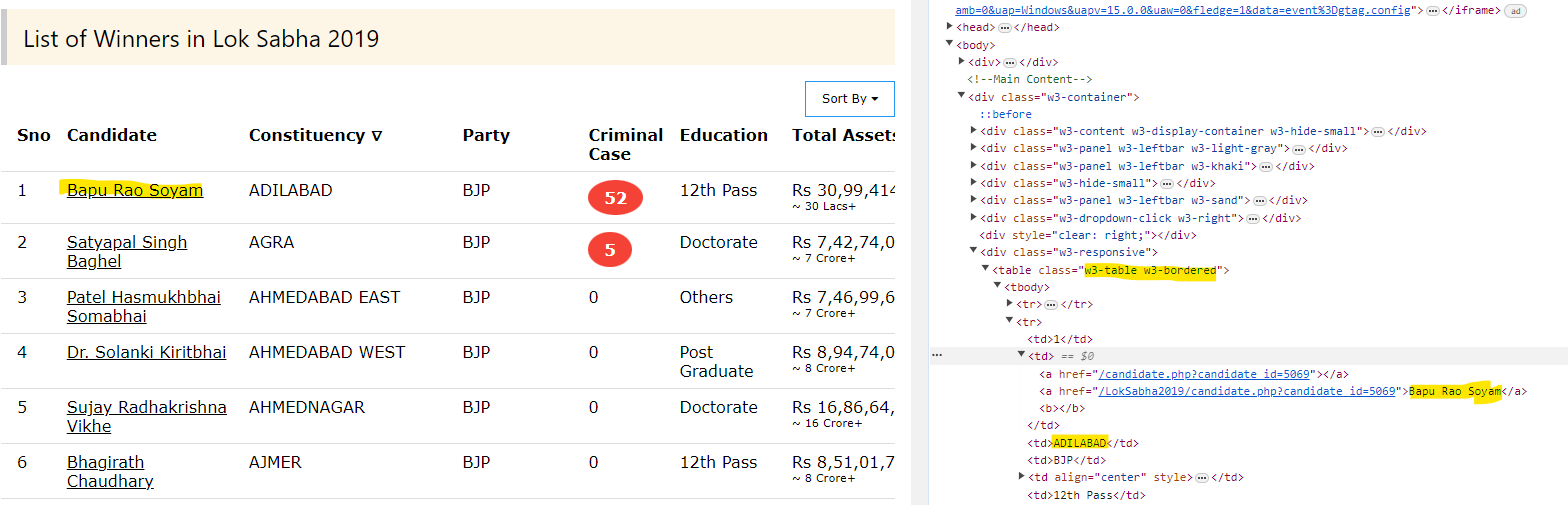

In [310]:
#Extracting data-tags from the html table
data = []
for row in table.find_all('tr'):
    row_data = []
    for cell in row.find_all('td'):
        row_data.append(cell.text)
    data.append(row_data)

In [311]:
#Creating html table
html_table = pd.DataFrame(data)

In [312]:
#Extracting headers of the dataframe

data_cols = []
for head in table.find_all('th'):
    data_cols.append(head.text)

In [313]:
print(data_cols)

['Sno', 'Candidate', 'Constituency ∇', 'Party ', 'Criminal Case ', 'Education ', 'Total Assets', 'Liabilities']


In [314]:
#Renaming columns as per INC rules
data_cols = ['Sno', 'Candidate', 'Constituency', 'Party', 'Criminal_Case', 'Education', 'Total_Assets', 'Liabilities']
html_table.columns = data_cols

In [315]:
html_table

,Sno,Candidate,Constituency,Party,Criminal_Case,Education,Total_Assets,Liabilities
0,None,None,None,None,None,None,None,None
1,1,Bapu Rao Soyam,ADILABAD,BJP,52,12th Pass,"Rs 30,99,414 ~ 30 Lacs+","Rs 2,31,450 ~ 2 Lacs+"
2,2,Satyapal Singh Baghel,AGRA,BJP,5,Doctorate,"Rs 7,42,74,036 ~ 7 Crore+","Rs 86,06,522 ~ 86 Lacs+"
3,3,Patel Hasmukhbhai Somabhai,AHMEDABAD EAST,BJP,0,Others,"Rs 7,46,99,690 ~ 7 Crore+","Rs 62,52,577 ~ 62 Lacs+"
4,4,Dr. Solanki Kiritbhai,AHMEDABAD WEST,BJP,0,Post Graduate,"Rs 8,94,74,039 ~ 8 Crore+",Rs 0 ~
...,...,...,...,...,...,...,...,...
533,533,Ramdas Chandrabhanji Tadas,WARDHA,BJP,0,10th Pass,"Rs 6,58,07,822 ~ 6 Crore+","Rs 89,61,387 ~ 89 Lacs+"
534,534,Rahul Gandhi,WAYANAD,INC,5,Post Graduate,"Rs 15,88,77,063 ~ 15 Crore+","Rs 72,01,904 ~ 72 Lacs+"
535,535,Parvesh Sahib Singh,WEST DELHI,BJP,0,Post Graduate,"Rs 15,51,95,014 ~ 15 Crore+","Rs 4,00,97,329 ~ 4 Crore+"
536,536,Bhavana Pundlikrao Gawali,YAVATMAL WASHIM,SHS,3,Graduate,"Rs 9,68,73,189 ~ 9 Crore+","Rs 73,96,250 ~ 73 Lacs+"


In [316]:
#Cleaning of HTML table
html_table.drop(0, axis = 0, inplace = True)

In [317]:
#Regular Expression to extract numbers

def re_cleaner(string):
    number = "".join(re.findall(r"\d+", string))
    return (number.strip()) 

<h4>Cleaning 'Assets' columns:</h4>

In [318]:
Assets = html_table['Total_Assets'].str.split('~', expand = True)
Assets.sample(5)

,0,1
152,"Rs 78,80,64,044",78 Crore+
206,"Rs 71,84,99,195",71 Crore+
248,"Rs 3,35,08,455",3 Crore+
76,"Rs 2,90,88,391",2 Crore+
6,"Rs 8,51,01,774",8 Crore+


In [319]:
#Renaming split columns
Assets.columns = ['Assets', 'Apprx_Assets']

In [320]:
#Extracting numbers from the string
Assets['Assets'] = Assets['Assets'].apply(re_cleaner)

#Replacing '' with 0
Assets['Assets'] = Assets['Assets'].replace('', '0')

In [321]:
#Changing the data_type of Total_Assets
Assets['Assets'] = Assets['Assets'].astype('int64')

<h4>Cleaning 'Liabilities' columns:</h4>

In [322]:
Liabilities = html_table['Liabilities'].str.split('~', expand = True)
Liabilities.sample(5)

,0,1
350,"Rs 2,11,36,135",2 Crore+
286,"Rs 53,83,958",53 Lacs+
507,Rs 0,
331,"Rs 10,00,075",10 Lacs+
203,"Rs 3,72,53,210",3 Crore+


In [323]:
#Renaming split columns
Liabilities.columns = ['Total_Liabilities', 'Apprx_Liabilities']

In [324]:
#Extracting numbers from the string
Liabilities['Total_Liabilities'] = Liabilities['Total_Liabilities'].apply(re_cleaner)

#Replacing '' with 0
Liabilities['Total_Liabilities'] = Liabilities['Total_Liabilities'].replace('', '0')

In [325]:
#Changing the data_type of Total_Assets
Liabilities['Total_Liabilities'] = Liabilities['Total_Liabilities'].astype('int64')

<h4>Concatenation of three dataframes:</h4>

In [326]:
table = pd.concat([html_table, Assets, Liabilities], axis = 1)

In [327]:
table.drop(['Total_Assets', 'Liabilities'], axis = 1, inplace = True)

In [328]:
table

,Sno,Candidate,Constituency,Party,Criminal_Case,Education,Assets,Apprx_Assets,Total_Liabilities,Apprx_Liabilities
1,1,Bapu Rao Soyam,ADILABAD,BJP,52,12th Pass,3099414,30 Lacs+,231450,2 Lacs+
2,2,Satyapal Singh Baghel,AGRA,BJP,5,Doctorate,74274036,7 Crore+,8606522,86 Lacs+
3,3,Patel Hasmukhbhai Somabhai,AHMEDABAD EAST,BJP,0,Others,74699690,7 Crore+,6252577,62 Lacs+
4,4,Dr. Solanki Kiritbhai,AHMEDABAD WEST,BJP,0,Post Graduate,89474039,8 Crore+,0,
5,5,Sujay Radhakrishna Vikhe,AHMEDNAGAR,BJP,0,Doctorate,168664576,16 Crore+,2623964,26 Lacs+
...,...,...,...,...,...,...,...,...,...,...
533,533,Ramdas Chandrabhanji Tadas,WARDHA,BJP,0,10th Pass,65807822,6 Crore+,8961387,89 Lacs+
534,534,Rahul Gandhi,WAYANAD,INC,5,Post Graduate,158877063,15 Crore+,7201904,72 Lacs+
535,535,Parvesh Sahib Singh,WEST DELHI,BJP,0,Post Graduate,155195014,15 Crore+,40097329,4 Crore+
536,536,Bhavana Pundlikrao Gawali,YAVATMAL WASHIM,SHS,3,Graduate,96873189,9 Crore+,7396250,73 Lacs+


In [329]:
table.to_csv('LokSabha_Winners_2019.csv')